In [6]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
diet = pd.read_csv("diet.csv")
reviews = pd.read_csv("reviews.csv")

Shows dietary preferences (vegan, vegetarian, omnivore) and age for each user \
271.907 rows \
The 3 groups have almost the same distibution of Age (see boxplot) \
Tem menos veganos (+-50k) e vegetarianos (+-80k) que onívoros (+-145k) mas acho que isso já é bem significativo

In [3]:
diet.head()

,AuthorId,Diet,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61


In [4]:
diet[diet["Diet"].isnull()]
# ou deletamos esse usuario ou colocamos que ele é onivoro

,AuthorId,Diet,Age
242181,646062A,NaN,63


<Axes: xlabel='Age', ylabel='Diet'>

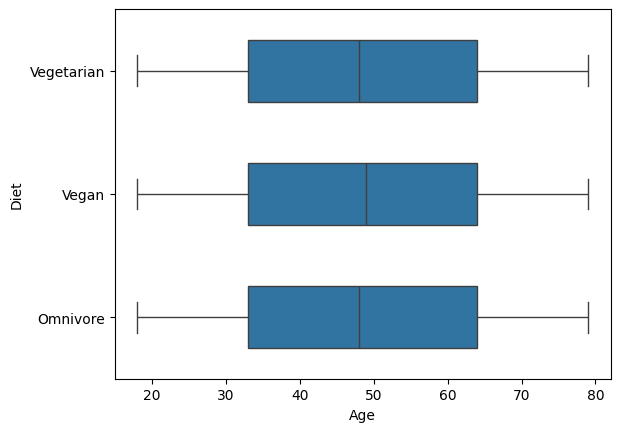

In [8]:
sns.boxplot(data = diet, x = "Age", y = "Diet", width = .5)
# veganos um pouquinho mais velhos, mas diferenca insignificante

In [7]:
diet.groupby(['Diet']).agg(Median = ("Age", 'median'),
                           Mean = ("Age", 'mean'),
                           StdDev = ("Age", 'std'),
                           Count = ("AuthorId", "count"))

,Median,Mean,StdDev,Count
Diet,,,,
Omnivore,48.0,48.490092,17.910033,78626
Vegan,49.0,48.574764,17.867253,49897
Vegetarian,48.0,48.486383,17.902422,143383


#### Review and Diet

Todos os users de Reviews estão na tabela Diet! \
Não conlui nada novo com esse pairplot...

In [ ]:
dietreviewsmerged = diet.merge(reviews, on = ["AuthorId"])
dietreviewsmerged = dietreviewsmerged[['AuthorId', 'Diet', 'Age', 'Rating', 'Like']]
sns.pairplot(dietreviewsmerged, hue = "Diet")

### Review 


In [ ]:
reviews["RatingValue"] = np.where(reviews["Rating"].isna(), 0, 1)
reviews["LikeValue"] = np.where(reviews["Like"].isna(), 0, 1)
reviews.groupby(["RatingValue", "LikeValue"])['AuthorId'].count()
#tem rating sem like, like sem rating e null nas duas
#Rating sem like: se maior que 2,5 entao Like (?)
#Like sem rating:
#Sem os dois: deleta a linha, não tras nenhuma info util

sns.boxplot(data = reviews, x = "Like", y = "Rating", width = .5)

reviews = reviews.drop(columns = ["RatingValue", "LikeValue"])